In [1]:
import pandas as pd,numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
import plotly

#classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingRegressor
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.discriminant_analysis import RepeatedStratifiedK
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.svm import SVC

#model evaluation tools
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#DATA PROCESSING FUNCTION

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme(palette='tab10',
             font='Lucida Calligraphy',
             font_scale=1.0
             )
import matplotlib
matplotlib.rcParams.update({'font.size':10})
plt.style.use('dark_background')

In [4]:
data=pd.read_csv('nyc_taxi.csv')

In [ ]:
data.sample(10).style.background_gradient(cmap='coolwarm')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
37341,21:27.0,5.500000,2014-10-07 09:21:27 UTC,-73.991938,40.744253,-73.994323,40.734937,1
11359,50:00.0,13.500000,2012-12-10 19:50:00 UTC,-74.005068,40.719835,-73.965072,40.710490,5
17775,42:00.0,28.500000,2010-09-12 12:42:00 UTC,-74.105245,40.846995,-74.105123,40.847042,1
25907,02:00.0,6.900000,2009-03-03 14:02:00 UTC,-73.985545,40.731620,-74.002345,40.733637,1
48824,55:00.0,5.300000,2009-09-15 19:55:00 UTC,-73.993933,40.746288,-74.006453,40.735673,2
18716,42:39.0,6.000000,2014-03-25 14:42:39 UTC,-73.960583,40.771537,-73.961470,40.763883,2
37320,50:00.0,23.700000,2009-02-13 02:50:00 UTC,-73.960527,40.761478,-73.995428,40.683547,2
9083,19:00.0,5.700000,2012-03-23 02:19:00 UTC,-73.930645,40.769027,-73.919795,40.757510,1
13745,41:25.0,24.900000,2009-04-04 06:41:25 UTC,-73.969946,40.761410,-74.020381,40.645820,1
27705,37:51.0,17.300000,2009-10-09 22:37:51 UTC,-74.017739,40.709538,-73.971953,40.784695,2


In [5]:
data.shape

(13575, 20)

In [6]:
data.describe().style.background_gradient(cmap='rainbow')

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13574.000000,13574.000000,13574.000000
mean,5314780.196832,1.526041,1.677053,1.897129,-8235547.607911,4975943.104144,1.006409,-8235396.055322,4975943.000318,1.386004,9.439052,0.308545,0.499006,1.208396,0.023801,0.284198,11.778759
std,3088873.906689,0.499340,1.326649,1.439509,1856.199595,2958.861932,0.149761,2053.025329,3081.730874,0.495400,4.963937,0.365858,0.024633,1.352904,0.505456,0.067017,5.800976
min,481.000000,1.000000,0.000000,0.000000,-8241544.853650,4968225.089660,1.000000,-8241735.946220,4968201.004220,1.000000,-3.000000,-0.500000,-0.500000,0.000000,0.000000,0.000000,-4.300000
25%,2652052.000000,1.000000,1.000000,0.930000,-8236787.497940,4973902.785785,1.000000,-8236735.265970,4973788.454145,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000
50%,5271594.000000,2.000000,1.000000,1.500000,-8235690.626580,4976097.483910,1.000000,-8235611.641650,4976170.919950,1.000000,8.000000,0.000000,0.500000,1.000000,0.000000,0.300000,10.400000
75%,8005780.000000,2.000000,2.000000,2.400000,-8234409.881710,4977982.330200,1.000000,-8234256.158350,4978106.242720,2.000000,11.500000,0.500000,0.500000,2.000000,0.000000,0.300000,14.150000
max,10679081.000000,2.000000,6.000000,38.700000,-8226721.165960,4982885.643410,5.000000,-8226513.936680,4982881.716630,4.000000,100.000000,1.000000,0.500000,22.700000,41.140000,0.300000,100.300000


In [7]:
categorical_columns=['unique_id','date_time_of_pickup']

In [ ]:
#fig,axes=plt.subplots(4,2,figsize=(12,15))
#for idx,cat_col in enumerate(categorical_columns):
   # row,col=idx//2,idx%2
   # sns.countplot(x=cat_col,data=data,hue='no_of_passenger',ax=axes[row,col])
   # axes[row,col].legend(fontsize='small')#set the font size for legend

#plt.subplots_adjust(hspace=1)
#plt.show()

fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='no_of_passenger',ax=axes[row,col])
    axes[row,col].legend(fontsize='small')#set the font size for legend
    
plt.subplots_adjust(hspace=1)
plt.show()

In [8]:
numerical_columns=['amount','longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff','no_of_passenger']

In [10]:
print(data.columns)  # Check available columns


Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_x',
       'pickup_y', 'RateCodeID', 'store_and_fwd_flag', 'dropoff_x',
       'dropoff_y', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')


In [11]:
columns_to_drop = ['no_of_passenger', 'unique_id']  # Add all unnecessary columns

# Drop only if they exist
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')


ValueError: Could not interpret value `no_of_passenger` for `x`. An entry with this name does not appear in `data`.

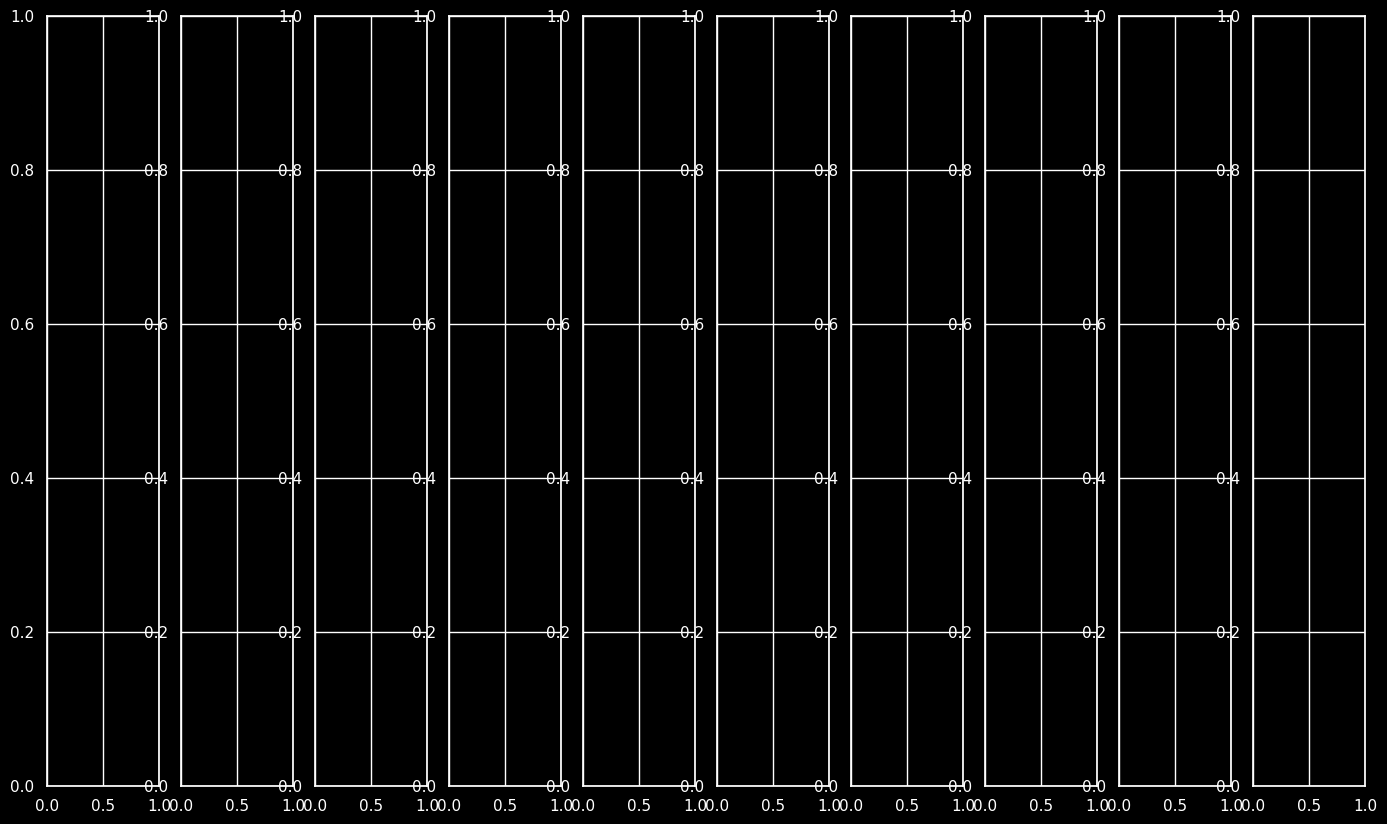

In [12]:
fig,axes=plt.subplots(1,10,figsize=(17,10))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='no_of_passenger',ax=axes[idx])
    print(data[numerical_columns].describe())
    plt.subplots_adjust(hspace=1)

KeyError: 'amount'

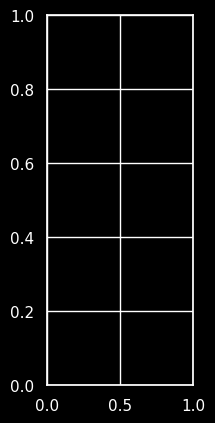

In [13]:
plt.subplot(131)
data['amount'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
data['longitude_of_pickup'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(133)
data['longitude_of_dropoff'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)


KeyError: 'latitude_of_pickup'

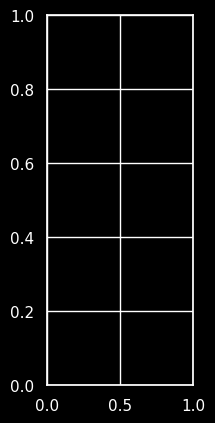

In [14]:
plt.subplot(131)
data['latitude_of_pickup'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
data['latitude_of_dropoff'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(133)
data['no_of_passenger'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

In [16]:
correlation_mat=data.corr()

ValueError: could not convert string to float: '2015-01-01 20:20:57'

In [15]:
sns.heatmap(correlation_mat,annot=True,linewidths=5,cmap="Blues")

NameError: name 'correlation_mat' is not defined

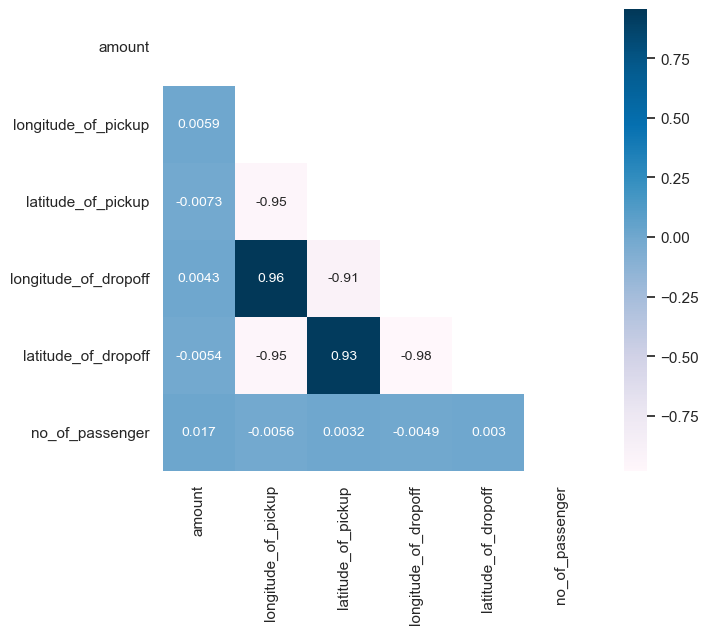

In [ ]:
mask=np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(7,6))
    ax=sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="PuBu")

In [ ]:
sns.pairplot(data,hue="no_of_passenger")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
#no need of checking outliers

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [ ]:
fig=px.histogram(data["unique_id"],x="unique_id",y="unique_id")
fig.update_layout(title="unique_id")
fig.show()

fig=px.histogram(data["amount"],x="amount",y="amount")
fig.update_layout(title="amount")
fig.show()

fig=px.histogram(data["date_time_of_pickup"],x="date_time_of_pickup",y="date_time_of_pickup")
fig.update_layout(title="date_time_of_pickup")
fig.show()

fig=px.histogram(data["latitude_of_pickup"],x="latitude_of_pickup",y="latitude_of_pickup")
fig.update_layout(title="latitude_of_pickup")
fig.show()

fig=px.histogram(data["longitude_of_pickup"],x="longitude_of_pickup",y="longitude_of_pickup")
fig.update_layout(title="longitude_of_pickup")
fig.show()

fig=px.histogram(data["longitude_of_dropoff"],x="longitude_of_dropoff",y="longitude_of_dropoff")
fig.update_layout(title="longitude_of_dropoff")
fig.show()

fig=px.histogram(data["latitude_of_dropoff"],x="latitude_of_dropoff",y="latitude_of_dropoff")
fig.update_layout(title="latitude_of_dropoff")
fig.show()

fig=px.histogram(data["no_of_passenger"],x="no_of_passenger",y="no_of_passenger")
fig.update_layout(title="no_of_passenger")
fig.show()


In [ ]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
data['date_time_of_pickup']=le.fit_transform(data['date_time_of_pickup'])
data.head()

NameError: name 'le' is not defined

In [ ]:
x=data.drop(['no_of_passenger','unique_id'],axis=1)
y=data['no_of_passenger']

NameError: name 'data' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
modl_svc=SVC(kernel ='linear')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

amount --> 0.14432898


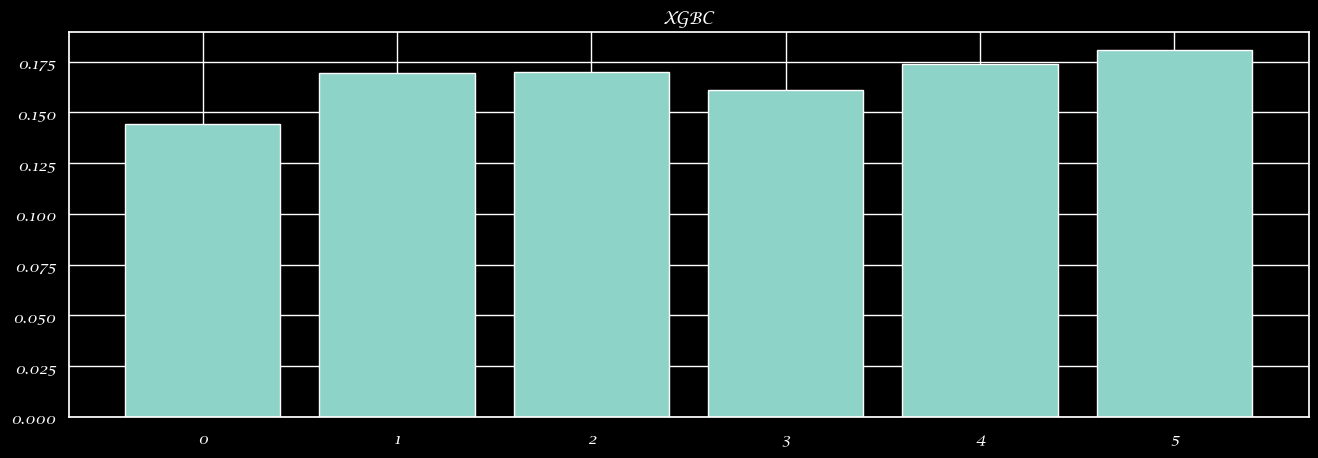

date_time_of_pickup --> 0.16967003


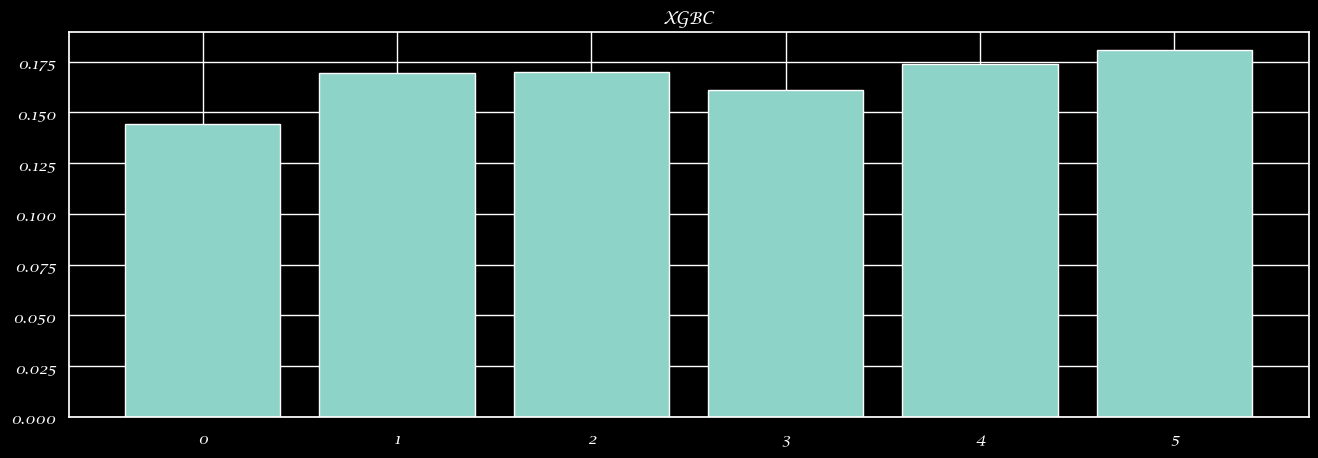

longitude_of_pickup --> 0.17010675


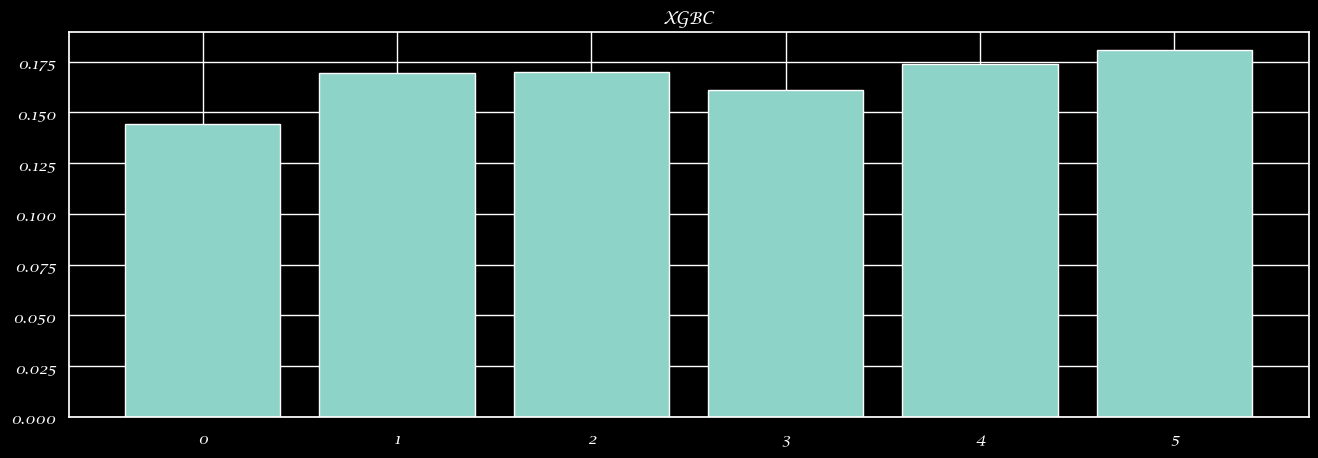

latitude_of_pickup --> 0.16127856


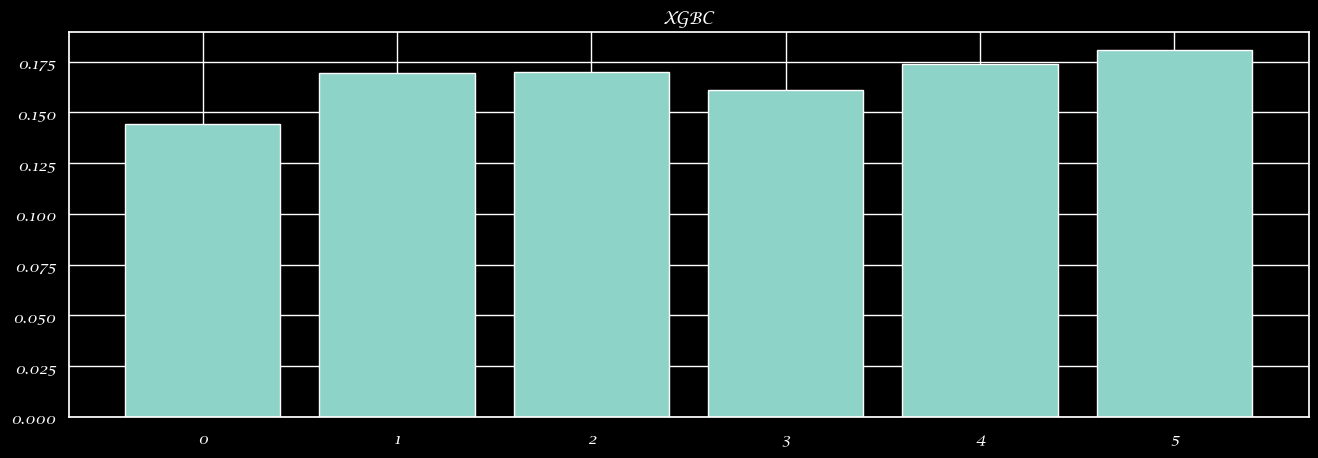

longitude_of_dropoff --> 0.17391953


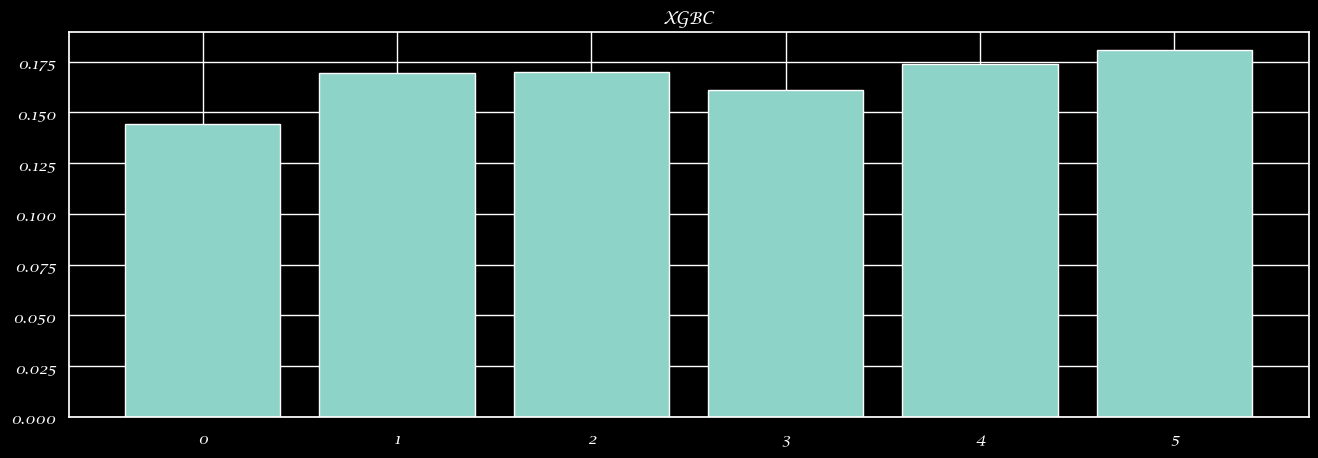

latitude_of_dropoff --> 0.18069617


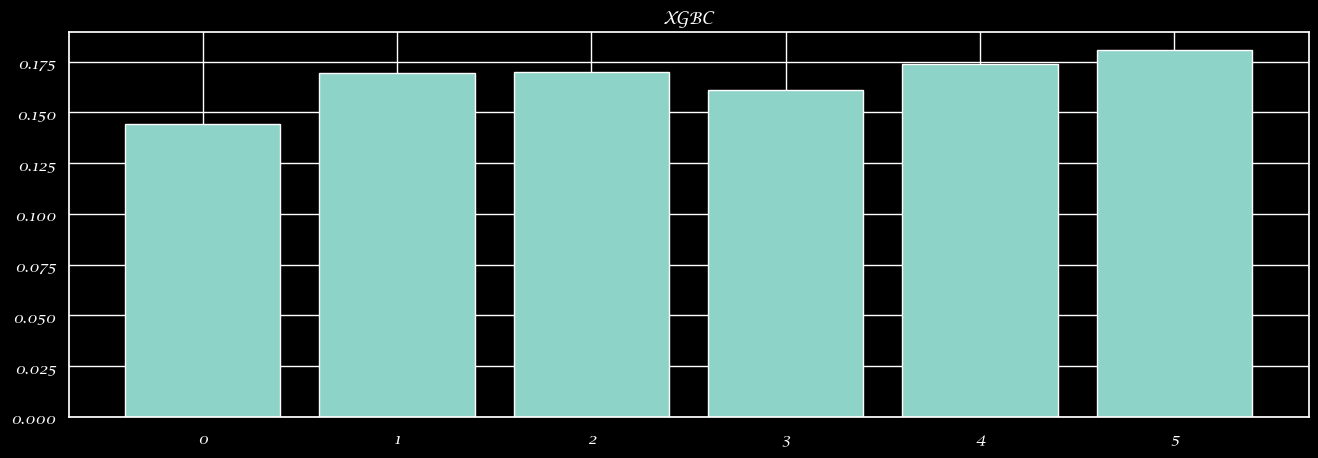

feature importance by random forest:->

amount --> 0.10433365081874946


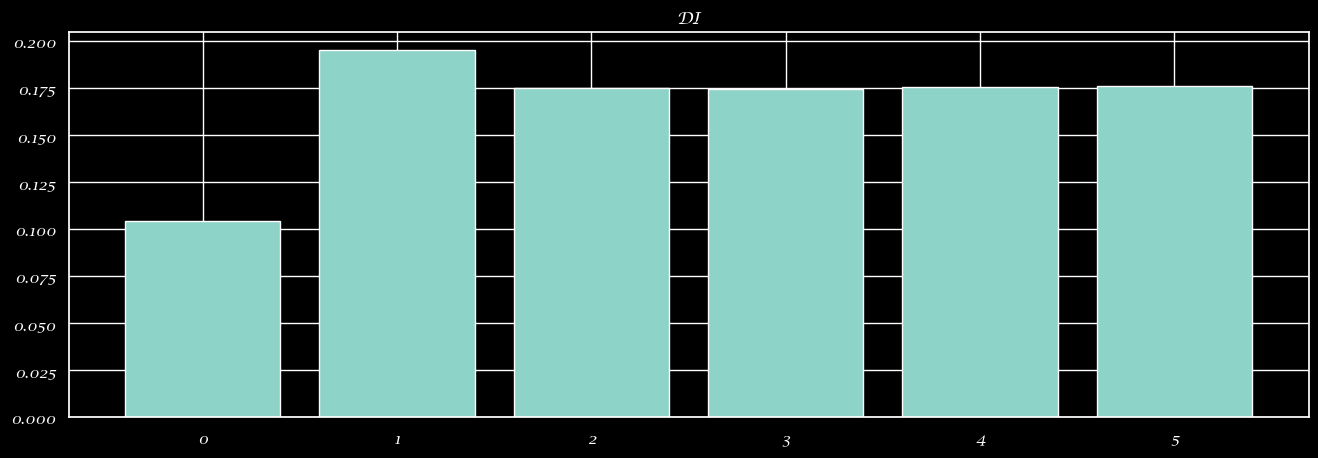

date_time_of_pickup --> 0.19500661587635681


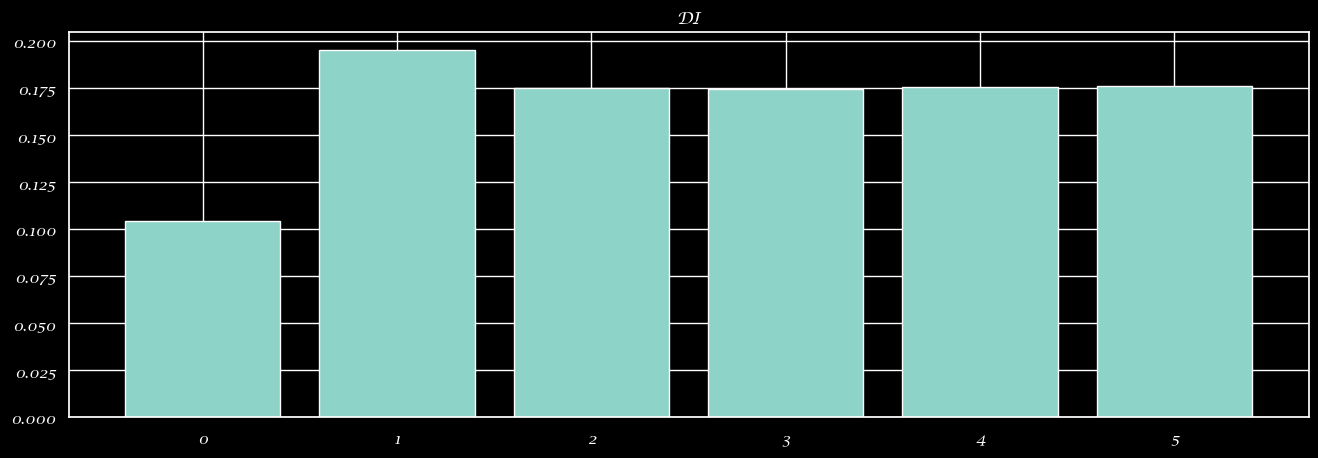

longitude_of_pickup --> 0.17512248825340843


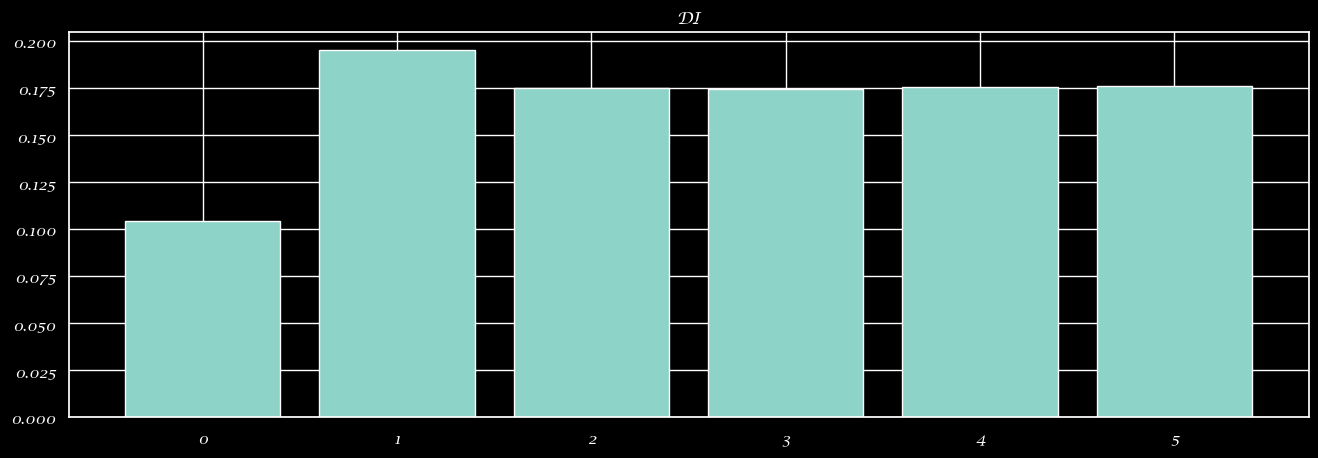

latitude_of_pickup --> 0.17423312328563878


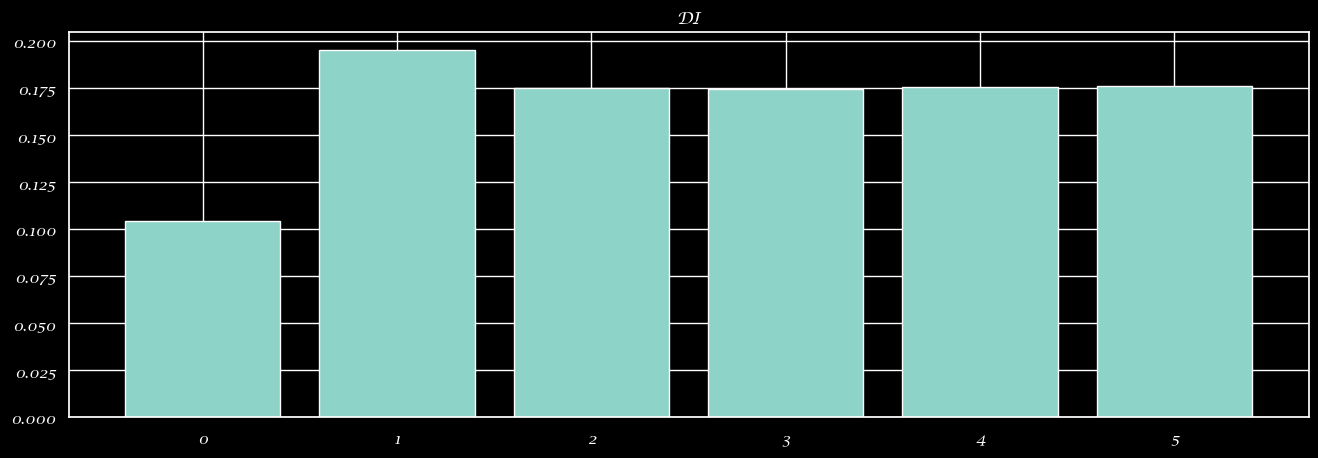

longitude_of_dropoff --> 0.175243167805819


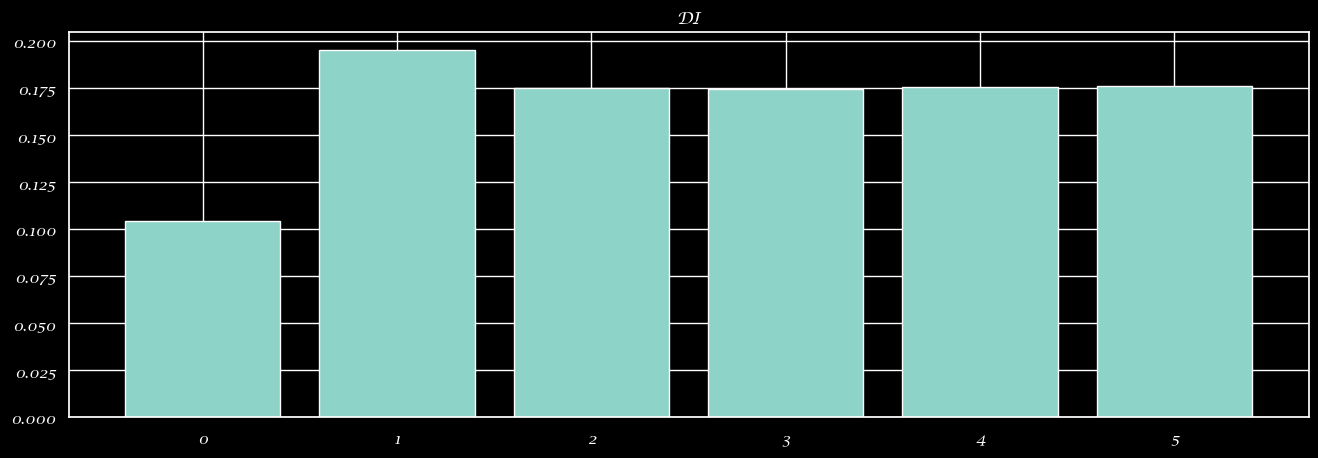

latitude_of_dropoff --> 0.17606095396002758


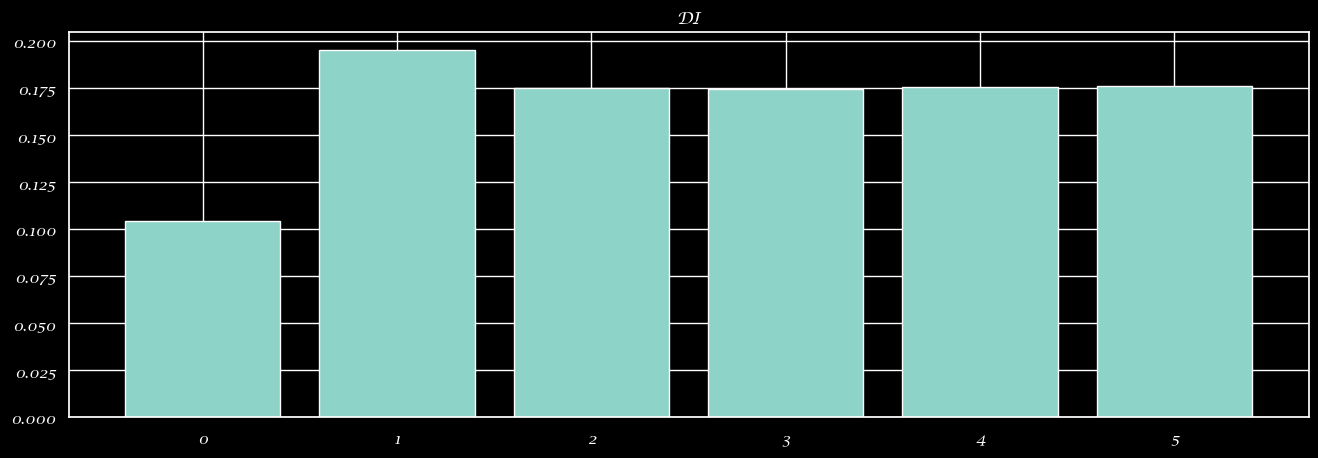

feature importance by slogistic regression:-->

amount --> -0.0004398952400517142


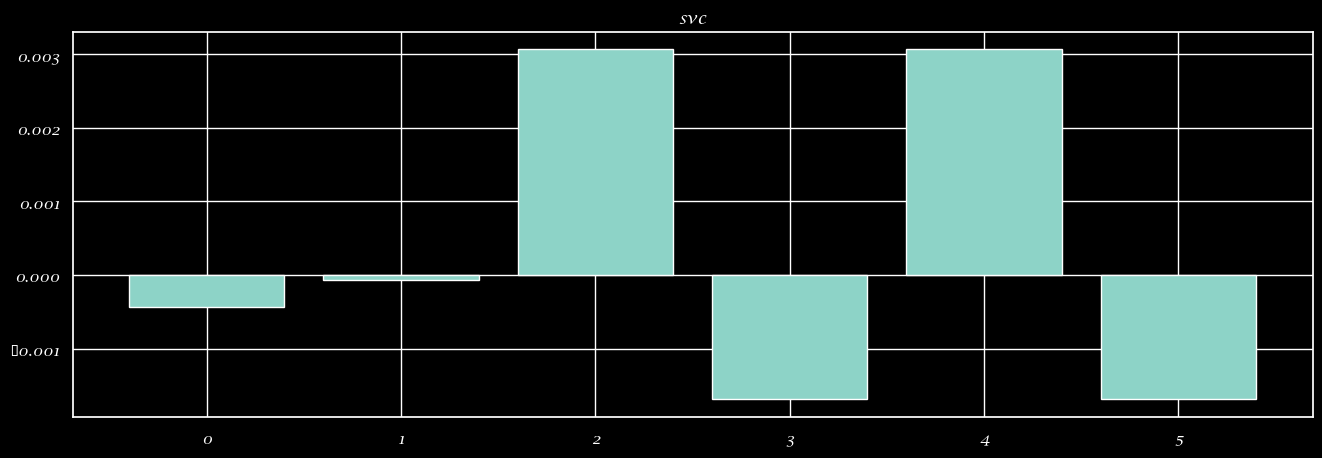

date_time_of_pickup --> -7.308044546193555e-05


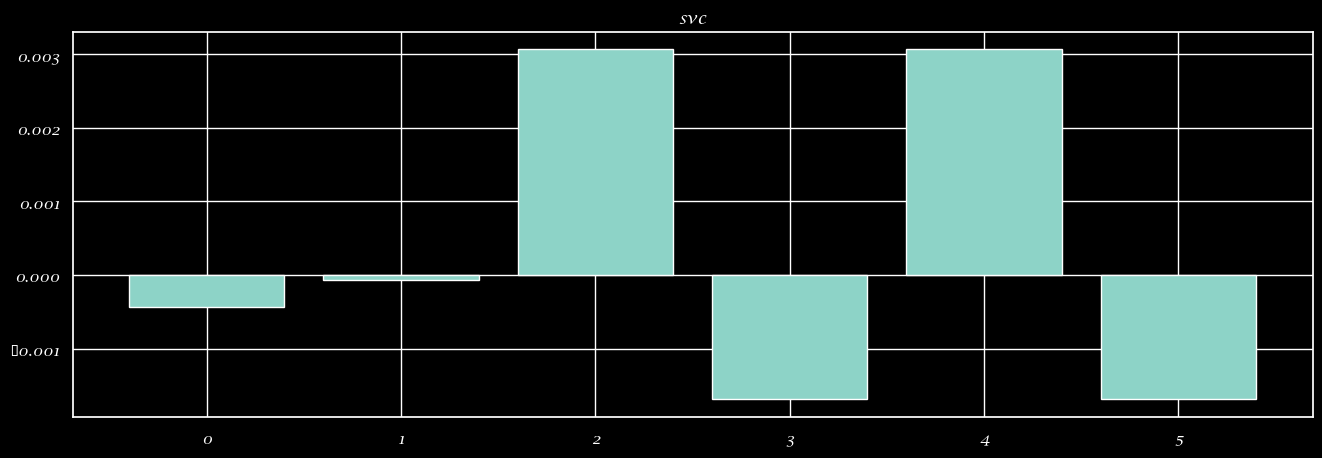

longitude_of_pickup --> 0.003064622820796181


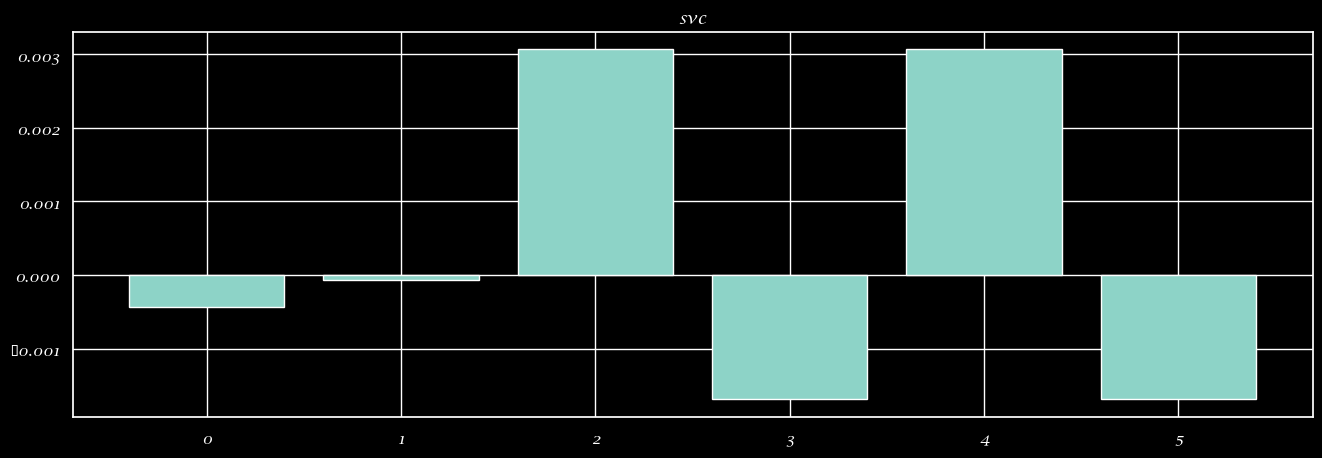

latitude_of_pickup --> -0.0016882276152712238


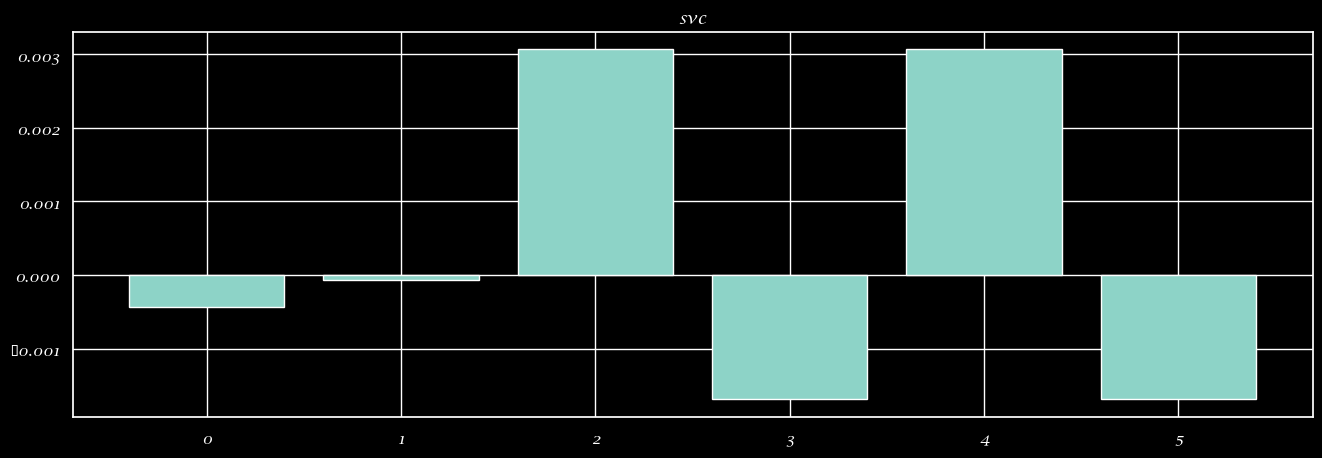

longitude_of_dropoff --> 0.003066537284227801


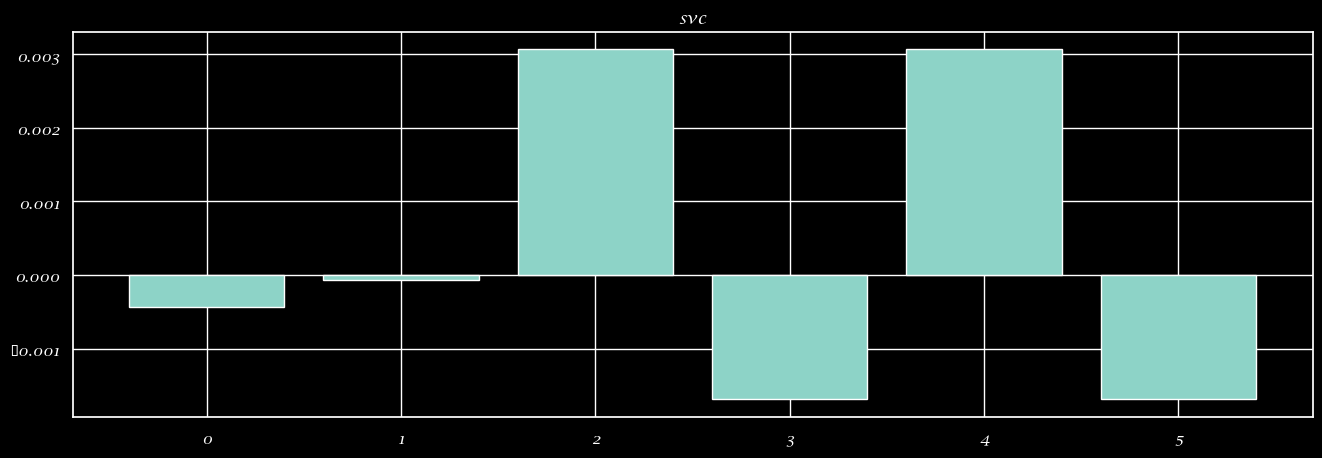

latitude_of_dropoff --> -0.0016891815320619547


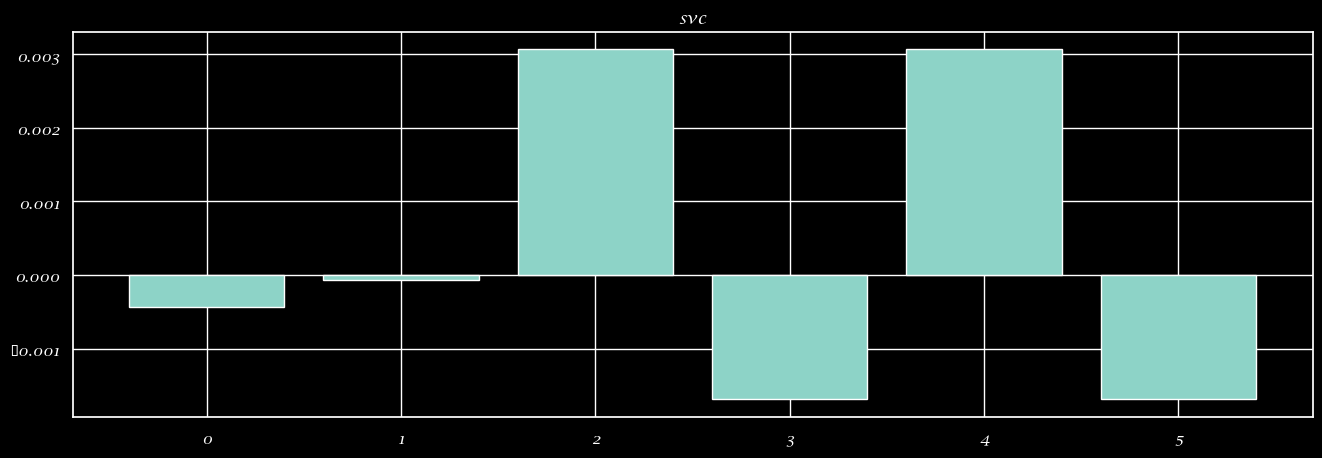

In [ ]:
XGBR=XGBRegressor()
XGBR.fit(x_train,y_train)
features =XGBR.feature_importances_
columns=list(x.columns)
for i,j in enumerate (features):
    print(columns[i],'-->',j)
    plt.figure(figsize=(16,5))
    plt.title(label="XGBC")
    plt.bar([x for x in range(len(features))],features)
    plt.show()

#plt_importance(XGBR)

print("feature importance by random forest:->\n")
RF=RandomForestRegressor()
RF.fit(x,y)
features =RF.feature_importances_
columns=list(x.columns)
for i,j in enumerate (features):
    print(columns[i],'-->',j)
    plt.figure(figsize=(16,5))
    plt.title(label="DI")
    plt.bar([x for x in range(len(features))],features)
    plt.show()

print("feature importance by slogistic regression:-->\n")
LOGC=LogisticRegression()
LOGC.fit(x,y)
features=LOGC.coef_[0]
columns=list(x.columns)
for i,j in enumerate (features):
    print(columns[i],'-->',j)
    plt.figure(figsize=(16,5))
    plt.title(label="svc")
    plt.bar([x for x in range(len(features))],features)
    plt.show()

In [ ]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)


LogisticRegression()

In [ ]:
model_lr.score(x_train,y_train)

0.6945428571428571

In [ ]:
model_lr.score(x_test,y_test)

0.6991333333333334

In [ ]:
modl_abc=AdaBoostClassifier(n_estimators=10,learning_rate=0.0003)
modl_gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=10)
modl_ref=RandomForestClassifier(n_estimators=1,min_samples_leaf=2, min_weight_fraction_leaf=0.01)

In [ ]:
modl_abc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.0003, n_estimators=10)

In [ ]:
modl_abc.score(x_train,y_train)

0.6947714285714286

In [ ]:
modl_abc.score(x_test,y_test)

0.6994

In [ ]:
modl_gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
modl_gbc.score(x_train,y_train)

0.6961428571428572

In [ ]:
modl_gbc.score(x_test,y_test)

0.6982

In [ ]:
modl_ref.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_weight_fraction_leaf=0.01,
                       n_estimators=1)

In [ ]:
modl_ref.score(x_train,y_train)

0.6947714285714286

In [ ]:
modl_ref.score(x_test,y_test)

0.6994

In [ ]:
def get_year(data):
    return data.year

def get_month(data):
    return data.month

def get_day(data):
    return data.day

def get_hour(data):
    return data.hour

def get_dayofweek(data):
    return data.dayofweek

In [ ]:
def get_distance(pick_lat, pick_long, drop_lat, drop_long):
    R = 6371
    phi1 = np.radians(pick_lat)
    phi2 = np.radians(drop_lat)

    delta_phi = np.radians(pick_lat-drop_lat)
    delta_lambda = np.radians(pick_long-drop_long)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dist = (R * c)

    return dist

In [ ]:
data['Distance'] = data.apply(lambda x: get_distance(x['latitude_of_pickup'], x['longitude_of_pickup'],
                                                      x['latitude_of_dropoff'], x['longitude_of_dropoff']), axis=1)



In [ ]:
data['Distance']

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: Distance, Length: 50000, dtype: float64

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (Example: Using mean for fare amount)
data['fare_amount'].fillna(data['fare_amount'].mean(), inplace=True)

# Drop rows where critical values are missing
data.dropna(subset=['latitude_of_pickup', 'longitude_of_pickup', 'latitude_of_dropoff', 'longitude_of_dropoff'], inplace=True)


In [ ]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract hour, day, and weekday
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday


In [ ]:
# Removing outliers for fare amount
data = data[(data['fare_amount'] > 2) & (data['fare_amount'] < 100)]


In [ ]:
from sklearn.svm import SVR  # Use SVR for regression
from sklearn.linear_model import Ridge  # Ridge regression for better stability
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data
X = data.drop(columns=['fare_amount', 'pickup_datetime'])  # Remove datetime
y = data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
svr_model = SVR(kernel='rbf')

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {'RandomForest': rf_model, 'GradientBoosting': gb_model, 'SVR': svr_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
    print("\n")


In [ ]:
import pickle

with open("taxifare_model.pkl", "wb") as file:
    pickle.dump(grid.best_estimator_, file)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')